Library	Version
Python	3.12.7
Scikit-Learn	1.5.1
Numpy	1.26.4
Pandas	2.2.2
Statsmodels	0.14.2
TensorFlow	2.17.0
Keras	3.4.1

In [165]:
import sys
import sklearn
import numpy
import pandas
import statsmodels
import tensorflow
import keras

print(f"Python version: {sys.version}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"NumPy version: {numpy.__version__}")
print(f"Pandas version: {pandas.__version__}")
print(f"Statsmodels version: {statsmodels.__version__}")
print(f"TensorFlow version: {tensorflow.__version__}")
print(f"Keras version: {keras.__version__}")

Python version: 3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Scikit-learn version: 1.5.1
NumPy version: 1.26.4
Pandas version: 2.2.2
Statsmodels version: 0.14.2
TensorFlow version: 2.17.0
Keras version: 3.4.1


In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score

In [167]:
# Creating the dataframe
df_original = pd.read_csv('DSCI 5240 Project Data.csv')

df=df_original.copy()
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Water Pump ID             4512 non-null   object 
 1   Water Source Type         4510 non-null   object 
 2   Water Quality             4515 non-null   object 
 3   Distance to Nearest Town  4517 non-null   object 
 4   Population Served         4044 non-null   object 
 5   Installation Year         4509 non-null   float64
 6   Funder                    4520 non-null   object 
 7   Payment Type              4511 non-null   object 
 8   Water Pump Age            4513 non-null   float64
 9   Pump Type                 4513 non-null   object 
 10  GPS Coordinates           4511 non-null   object 
 11  Functioning Status        4513 non-null   object 
dtypes: float64(2), object(10)
memory usage: 468.9+ KB


In [168]:
# Remove all brackets and quotation marks
df['Water Source Type'] = df['Water Source Type'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df['Water Quality'] = df['Water Quality'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df['Distance to Nearest Town'] = df['Distance to Nearest Town'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df['Population Served'] = df['Population Served'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df['Funder'] = df['Funder'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df['Payment Type'] = df['Payment Type'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df['Pump Type'] = df['Pump Type'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df['Functioning Status'] = df['Functioning Status'].str.replace(r"[\[\]']", '', regex=True).str.strip()

#Converting all column's datatype
df['Water Source Type'] = df['Water Source Type'].astype('category')
df['Water Quality'] = df['Water Quality'].astype('category')
df['Distance to Nearest Town'] = df['Distance to Nearest Town'].astype(float)
df['Population Served'] = df['Population Served'].astype(float)
df['Installation Year'] = df['Installation Year'].astype(float)
df['Funder'] = df['Funder'].astype('category')
df['Payment Type'] = df['Payment Type'].astype('category')
df['Pump Type'] = df['Pump Type'].astype('category')
df['Functioning Status'] = df['Functioning Status'].astype('category')

# splitting GPS Coordinates into two float columns
df[['Latitude', 'Longitude']] = df['GPS Coordinates'].str.strip('()').str.split(',', expand=True).astype(float)
df.drop('GPS Coordinates', axis=1, inplace=True)

df.head(5)

,Water Pump ID,Water Source Type,Water Quality,Distance to Nearest Town,Population Served,Installation Year,Funder,Payment Type,Water Pump Age,Pump Type,Functioning Status,Latitude,Longitude
0,NaN,Lake,Contaminated,37.0,13000.0,2013.0,Oxfam,Free,11.0,Motorized Pump,Not Functioning,-20.671989,24.746129
1,WP002,Lake,Contaminated,7.0,11000.0,1992.0,Red Cross,Free,NaN,Motorized Pump,Functioning,-20.157282,25.785519
2,WP003,Lake,Contaminated,45.0,10000.0,1993.0,NaN,Pay per use,31.0,Motorized Pump,Functioning,-23.738542,22.355246
3,WP004,Well,NaN,8.0,14000.0,NaN,Red Cross,Free,26.0,NaN,NaN,-18.360569,26.512975
4,WP005,Lake,Contaminated,29.0,9000.0,2006.0,Red Cross,Free,18.0,Motorized Pump,Functioning,-18.907023,26.194293


In [169]:
# Count the missing value in each column
print(df.isnull().sum())

Water Pump ID               488
Water Source Type           490
Water Quality               485
Distance to Nearest Town    483
Population Served           956
Installation Year           491
Funder                      480
Payment Type                489
Water Pump Age              487
Pump Type                   487
Functioning Status          487
Latitude                    489
Longitude                   489
dtype: int64


In [170]:
#counting rows with 5 or more missing values
missing_values_per_row = df.isnull().sum(axis=1)
count_rows_with_many_missing = (missing_values_per_row > 5).sum()

print("Number of rows with 5 or more missing values:", count_rows_with_many_missing)

Number of rows with 5 or more missing values: 5


In [171]:
# show some summary statistics
print(df.describe(include='all'))

       Water Pump ID Water Source Type Water Quality  \
count           4512              4510          4515   
unique          4512                 4             2   
top            WP002              Lake  Contaminated   
freq               1              2316          3284   
mean             NaN               NaN           NaN   
std              NaN               NaN           NaN   
min              NaN               NaN           NaN   
25%              NaN               NaN           NaN   
50%              NaN               NaN           NaN   
75%              NaN               NaN           NaN   
max              NaN               NaN           NaN   

        Distance to Nearest Town  Population Served  Installation Year Funder  \
count                4517.000000        4044.000000        4509.000000   4520   
unique                       NaN                NaN                NaN      5   
top                          NaN                NaN                NaN  USAID   
fre

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Water Pump ID             4512 non-null   object  
 1   Water Source Type         4510 non-null   category
 2   Water Quality             4515 non-null   category
 3   Distance to Nearest Town  4517 non-null   float64 
 4   Population Served         4044 non-null   float64 
 5   Installation Year         4509 non-null   float64 
 6   Funder                    4520 non-null   category
 7   Payment Type              4511 non-null   category
 8   Water Pump Age            4513 non-null   float64 
 9   Pump Type                 4513 non-null   category
 10  Functioning Status        4513 non-null   category
 11  Latitude                  4511 non-null   float64 
 12  Longitude                 4511 non-null   float64 
dtypes: category(6), float64(6), object(1)
memory usa

Z-scores of outliers based on Z-score method:
      Population Served   Z-score     Outlier_Column
1777             4000.0 -3.019489  Population Served
1826             4000.0 -3.019489  Population Served
1989             4000.0 -3.019489  Population Served
2522             4000.0 -3.019489  Population Served
2537             4000.0 -3.019489  Population Served
3646             4000.0 -3.019489  Population Served
3779             2000.0 -3.687441  Population Served
3895             3000.0 -3.353465  Population Served
4193             4000.0 -3.019489  Population Served
4285             4000.0 -3.019489  Population Served
4433            23000.0  3.326047  Population Served
4979             3000.0 -3.353465  Population Served


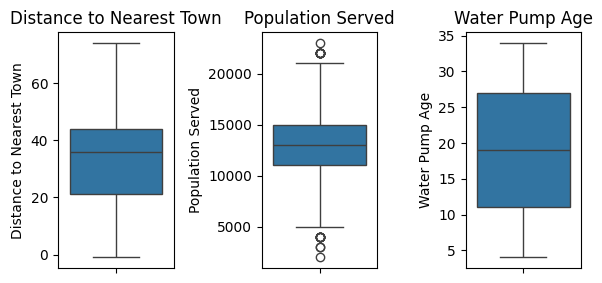

In [173]:
# Create a new DataFrame with only numerical columns
df_numerical = df.select_dtypes(exclude=['object', 'category'])

def find_outliers_zscore(df):
    outliers = pd.DataFrame()  # Empty dataframe to store outliers

    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()

        # Calculate Z-scores for the current column
        df['Z-score'] = (df[column] - mean) / std

        # Find rows where Z-score > 3 or Z-score < -3 (outliers)
        column_outliers = df[(df['Z-score'] > 3) | (df['Z-score'] < -3)][[column, 'Z-score']]

        if not column_outliers.empty:
            column_outliers['Outlier_Column'] = column  # Label the outlier source column
            outliers = pd.concat([outliers, column_outliers])  # Append to the outliers dataframe

    return outliers

# Call the function to find the Z-scores of outliers
outliers_zscore = find_outliers_zscore(df_numerical)

# Print the Z-scores for outliers
print("Z-scores of outliers based on Z-score method:")
print(outliers_zscore)

# box plots for all numberical data to find outliers
columns_to_plot = ['Distance to Nearest Town', 'Population Served', 'Water Pump Age']
plt.figure(figsize=(6, 8))
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_numerical[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()


In [204]:
# Replace missing values
for column in df.columns:
    if column == 'Population Served':
        # Replace NaN with the median for population served as it is unaffected by the outliers.
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    elif df[column].dtype == 'float64':
        # Replace NaN with the mean for float columns
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif df[column].dtype == 'category':
        # Replace NaN with the mode for object columns
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

# Replacing negative value for Distance to Nearest Town
distance_column = 'Distance to Nearest Town'
mean_distance = df[df[distance_column] >= 0][distance_column].mean()
df[distance_column] = df[distance_column].apply(lambda x: mean_distance if x < 0 else x)


#Calculating the current age of all the pumps
df.drop('Water Pump Age', axis=1, inplace=True)
df['Water Pump Age'] = 2024 - df['Installation Year']
df.drop('Installation Year', axis=1, inplace=True)
# Converting the datatype to integer for faster calculation
df['Water Pump Age'] = df['Water Pump Age'].astype(int)
df['Distance to Nearest Town'] = df['Distance to Nearest Town'].astype(int)
df['Population Served'] = df['Population Served'].astype(int)
#df['Installation Year'] = df['Installation Year'].astype(int)

# Dropping the column
df.drop('Water Pump ID', axis=1, inplace=True)

#Creating a new column with original name and indexing format
df['Water Pump ID'] = [f'WP{str(index).zfill(3)}' for index in range(1, len(df) + 1)]

# Move the Water Pump ID to index position 0
df.insert(0, 'Water Pump ID', df.pop('Water Pump ID'))
df.insert(6, 'Water Pump Age', df.pop('Water Pump Age'))
print(df.head(5))
print("\n")
print("Total number of null values in the dataset:")
print(df.isnull().sum())

  Water Pump ID Water Source Type Water Quality  Distance to Nearest Town  \
0         WP001              Lake  Contaminated                        37   
1         WP002              Lake  Contaminated                         7   
2         WP003              Lake  Contaminated                        45   
3         WP004              Well  Contaminated                         8   
4         WP005              Lake  Contaminated                        29   

   Population Served     Funder  Water Pump Age Payment Type       Pump Type  \
0              13000      Oxfam              11         Free  Motorized Pump   
1              11000  Red Cross              32         Free  Motorized Pump   
2              10000      USAID              31  Pay per use  Motorized Pump   
3              14000  Red Cross              19         Free  Motorized Pump   
4               9000  Red Cross              18         Free  Motorized Pump   

  Functioning Status   Latitude  Longitude  
0    Not Fu

In [205]:
# show some summary statistics
print(df.describe(include='all'))

       Water Pump ID Water Source Type Water Quality  \
count           5000              5000          5000   
unique          5000                 4             2   
top            WP001              Lake  Contaminated   
freq               1              2806          3769   
mean             NaN               NaN           NaN   
std              NaN               NaN           NaN   
min              NaN               NaN           NaN   
25%              NaN               NaN           NaN   
50%              NaN               NaN           NaN   
75%              NaN               NaN           NaN   
max              NaN               NaN           NaN   

        Distance to Nearest Town  Population Served Funder  Water Pump Age  \
count                5000.000000         5000.00000   5000     5000.000000   
unique                       NaN                NaN      5             NaN   
top                          NaN                NaN  USAID             NaN   
freq           

In [206]:
print(df.isnull().sum())

Water Pump ID               0
Water Source Type           0
Water Quality               0
Distance to Nearest Town    0
Population Served           0
Funder                      0
Water Pump Age              0
Payment Type                0
Pump Type                   0
Functioning Status          0
Latitude                    0
Longitude                   0
dtype: int64


In [207]:
import pandas as pd

# Assume df is your DataFrame
# Calculate the 1st quartile (Q1) and the 3rd quartile (Q3)
Q1 = df['Population Served'].quantile(0.25)
Q3 = df['Population Served'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers by replacing values outside the bounds with the respective bound
df['Population Served'] = df['Population Served'].clip(lower=lower_bound, upper=upper_bound)

# Check the result
print(df['Population Served'].describe())


count     5000.00000
mean     13033.80000
std       2675.23624
min       5000.00000
25%      11000.00000
50%      13000.00000
75%      15000.00000
max      21000.00000
Name: Population Served, dtype: float64


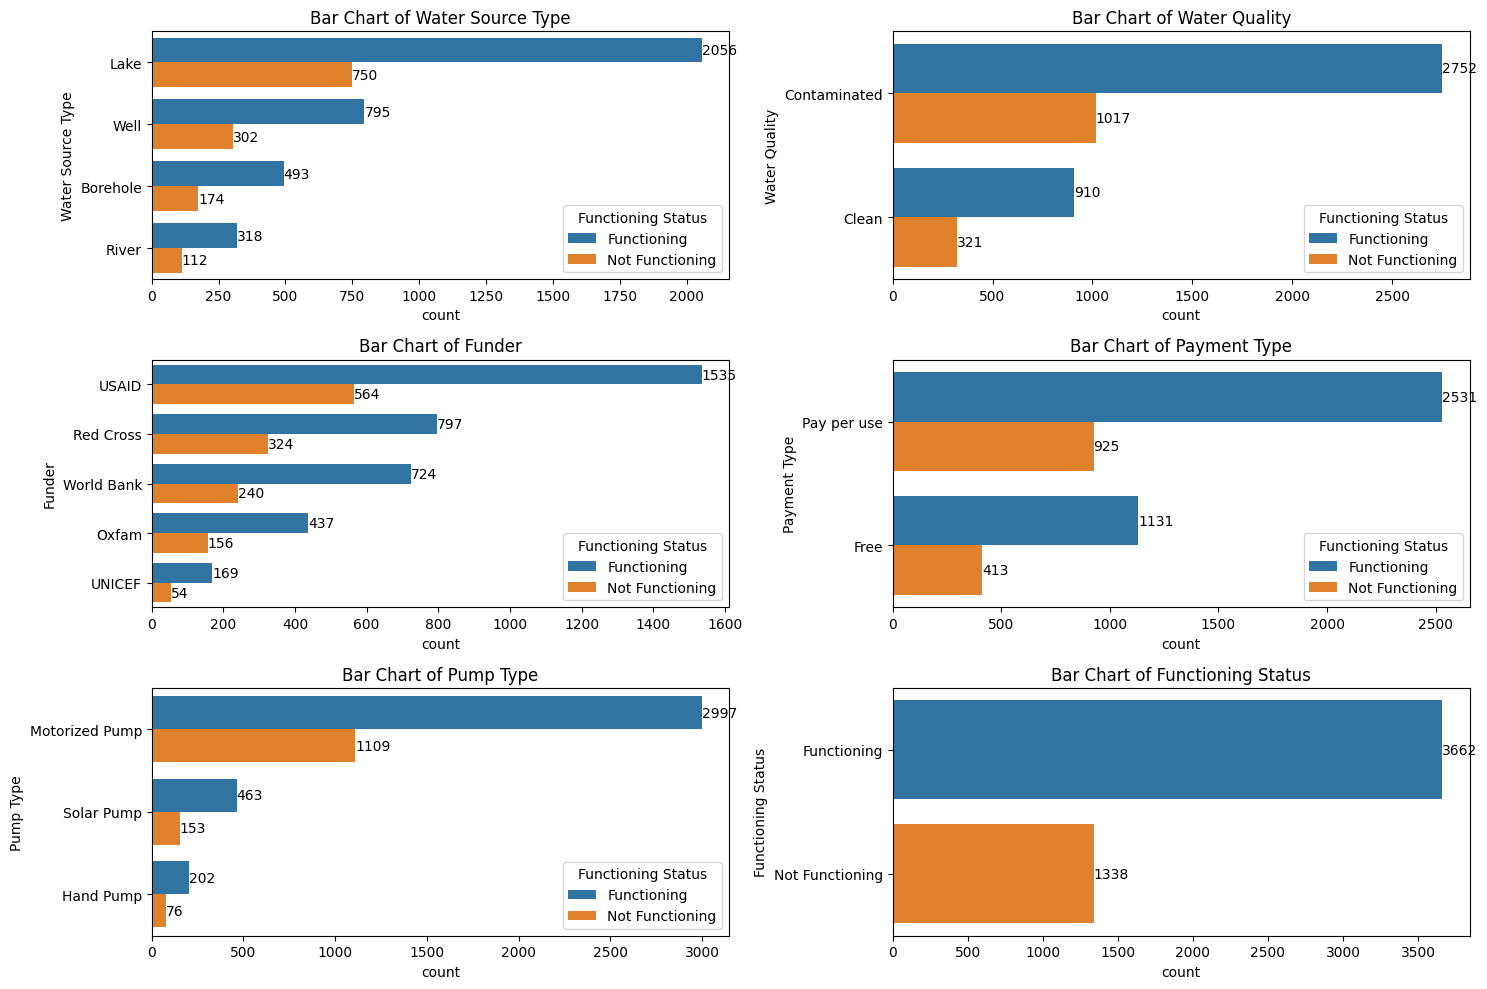

In [208]:
df_numerical = df.select_dtypes(exclude=['object', 'category'])

# Visualizing categorical columns with count labels
categorical_columns = ['Water Source Type', 'Water Quality', 'Funder', 'Payment Type', 'Pump Type', 'Functioning Status']
plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns):
    plt.subplot(3, 2, i + 1)
    ax = sns.countplot(y=column, data=df, hue='Functioning Status', order=df[column].value_counts().index)
    for p in ax.patches:
        count = int(p.get_width())  # Get the count (width of the bar)
        if count > 0:  # Only plot if the count is non-zero
            ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2, count, va='center')

    plt.title(f'Bar Chart of {column}')

plt.tight_layout()
plt.show()

In [209]:
# creating a copy of original dataframe
df_new = df.copy()
"""
import numpy as np

# Bin the 'Population Served' column into groups
df_new['Population_Group'] = pd.cut(
    df_new['Population Served'], 
    bins=[2000, 11000, 13000, 15000, 23000], 
    labels=['1', '2', '3', '4'], 
    include_lowest=True
)

# Create dummy variables for the groups
population_dummies = pd.get_dummies(df_new['Population_Group'], prefix='Pop_Grp', drop_first=True)

# Concatenate the dummies back to the dataframe
df_new = pd.concat([df_new, population_dummies], axis=1)

# Drop the original Population_Group column
df_new.drop('Population_Group', axis=1, inplace=True)


#Feature engineering for Water Pump Age
df_new['Age_Group'] = pd.cut(df_new['Water Pump Age'], bins=[0, 5, 10, np.inf], labels=['Pump Age 0-5', 'Pump Age 5-10', 'Pump Age 10+'])
df_new = pd.concat([df_new, pd.get_dummies(df_new['Age_Group'])], axis=1)
df_new.drop('Age_Group', axis=1, inplace=True)

# Feature engineering for Distance to Nearest Town
df_new['Distance_Group'] = pd.cut(df_new['Distance to Nearest Town'], bins=[0, 10, 20, np.inf], labels=['Distance 0-10', 'Distance 10-20', 'Distance 20+'])
df_new = pd.concat([df_new, pd.get_dummies(df_new['Distance_Group'])], axis=1)
df_new.drop('Distance_Group', axis=1, inplace=True)
"""

df_new.head(5)

,Water Pump ID,Water Source Type,Water Quality,Distance to Nearest Town,Population Served,Funder,Water Pump Age,Payment Type,Pump Type,Functioning Status,Latitude,Longitude
0,WP001,Lake,Contaminated,37,13000,Oxfam,11,Free,Motorized Pump,Not Functioning,-20.671989,24.746129
1,WP002,Lake,Contaminated,7,11000,Red Cross,32,Free,Motorized Pump,Functioning,-20.157282,25.785519
2,WP003,Lake,Contaminated,45,10000,USAID,31,Pay per use,Motorized Pump,Functioning,-23.738542,22.355246
3,WP004,Well,Contaminated,8,14000,Red Cross,19,Free,Motorized Pump,Functioning,-18.360569,26.512975
4,WP005,Lake,Contaminated,29,9000,Red Cross,18,Free,Motorized Pump,Functioning,-18.907023,26.194293


In [210]:
import pandas as pd

# checking the relationship between Payment Type and Funder
cross_tab = pd.crosstab(df_new['Funder'], df_new['Payment Type'])
print(cross_tab)


Payment Type  Free  Pay per use
Funder                         
Oxfam          192          401
Red Cross      352          769
UNICEF          72          151
USAID          655         1444
World Bank     273          691


In [196]:
"""import pandas as pd

# Assuming 'df_new' is your DataFrame
df_new['Funder_Payment_Type'] = df_new['Funder'].astype(str) + '_' + df_new['Payment Type'].astype(str)

df_new.drop('Funder', axis=1, inplace=True)
df_new.drop('Payment Type',axis=1, inplace=True)
print(df_new['Funder_Payment_Type'])"""

"import pandas as pd\n\n# Assuming 'df_new' is your DataFrame\ndf_new['Funder_Payment_Type'] = df_new['Funder'].astype(str) + '_' + df_new['Payment Type'].astype(str)\n\ndf_new.drop('Funder', axis=1, inplace=True)\ndf_new.drop('Payment Type',axis=1, inplace=True)\nprint(df_new['Funder_Payment_Type'])"

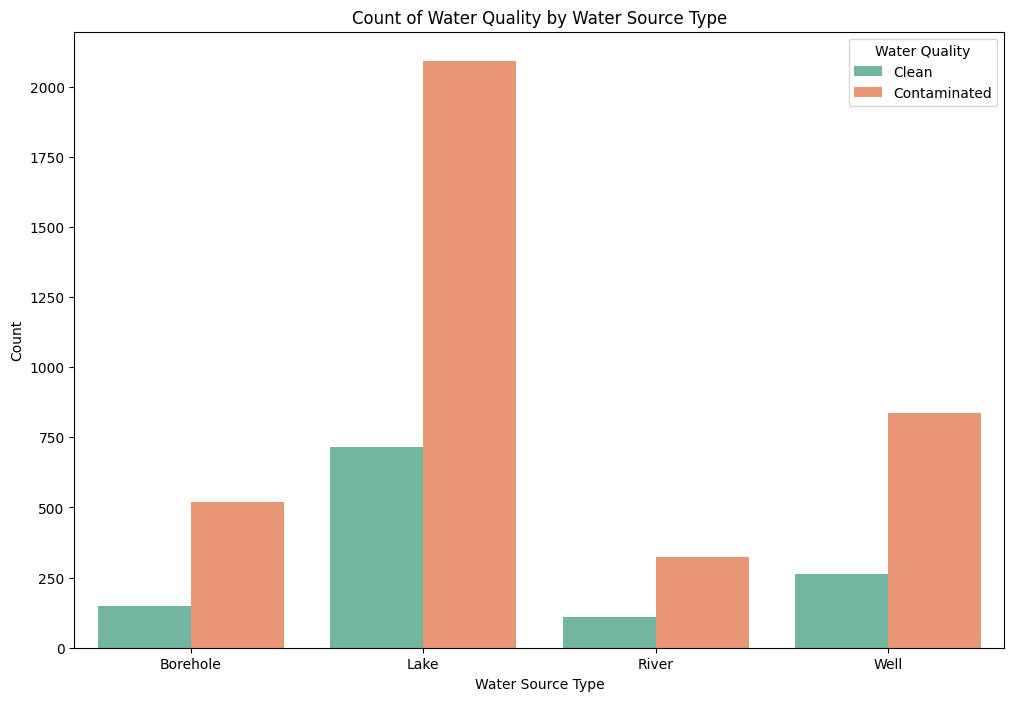

In [211]:
# The relationship between 'Water Source Type' and 'Water Quality'
bar_data = df_new.groupby(['Water Source Type', 'Water Quality']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Water Source Type', y='Count', hue='Water Quality', data=bar_data, palette='Set2')
plt.title('Count of Water Quality by Water Source Type')
plt.xlabel('Water Source Type')
plt.ylabel('Count')
plt.legend(title='Water Quality')
plt.show()

In [212]:
import folium
from folium.plugins import FastMarkerCluster

# Create a map centered at the mean latitude and longitude and
map_center = [df_new['Latitude'].mean(), df_new['Longitude'].mean()]

# Creating a base map and start zoom level
map_object = folium.Map(location=map_center, zoom_start=6)

# Prepare a list of coordinate tuples
coordinates = list(zip(df_new['Latitude'], df_new['Longitude']))

# Add a FastMarkerCluster to the map
FastMarkerCluster(coordinates).add_to(map_object)

# Display the map
map_object


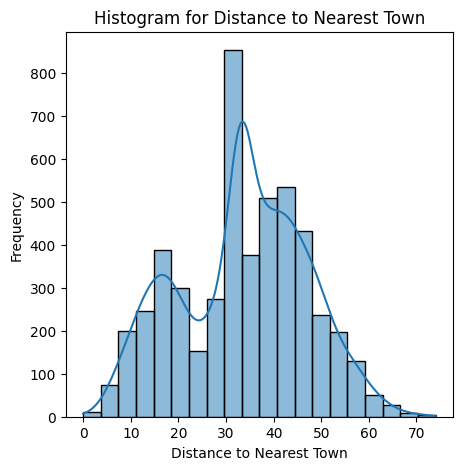

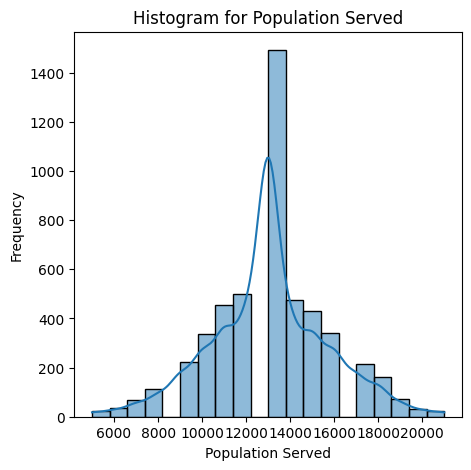

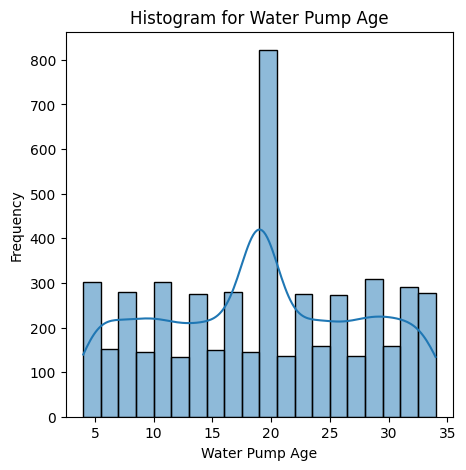

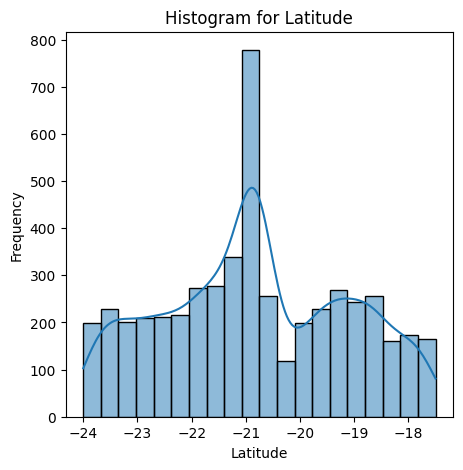

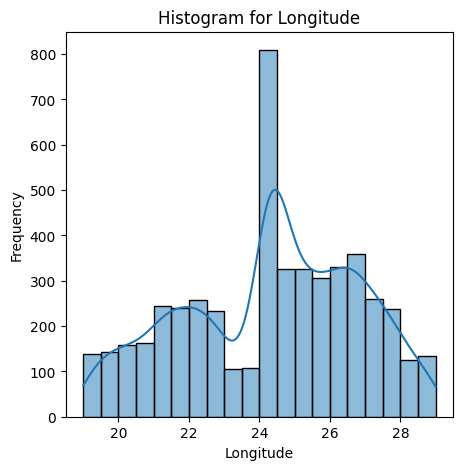

In [213]:
# Creating histogram for all numerical values
for column in df_numerical:
    plt.figure(figsize=(5, 5))
    sns.histplot(df_numerical[column], kde=True, bins=20)  # kde=True adds a density line
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



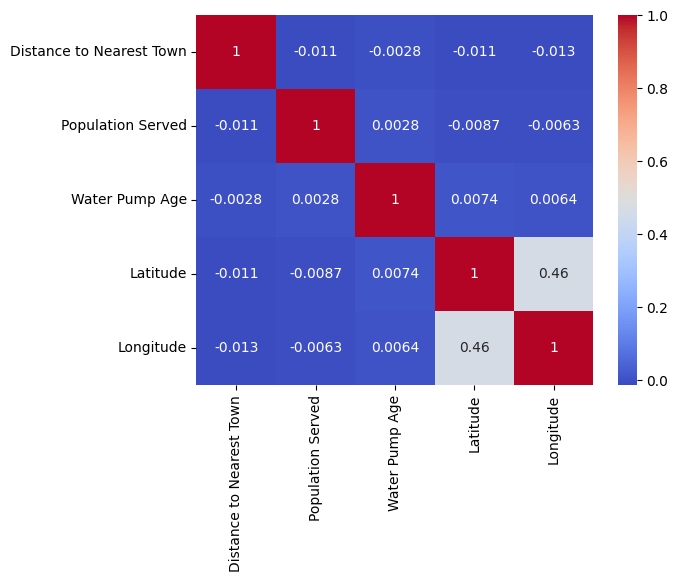

In [214]:
# Calculate correlation
correlation_matrix = df_numerical.corr()

# Visualize correlation using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [215]:
df_new.columns

Index(['Water Pump ID', 'Water Source Type', 'Water Quality',
       'Distance to Nearest Town', 'Population Served', 'Funder',
       'Water Pump Age', 'Payment Type', 'Pump Type', 'Functioning Status',
       'Latitude', 'Longitude'],
      dtype='object')

In [216]:
df_numerical.columns

Index(['Distance to Nearest Town', 'Population Served', 'Water Pump Age',
       'Latitude', 'Longitude'],
      dtype='object')

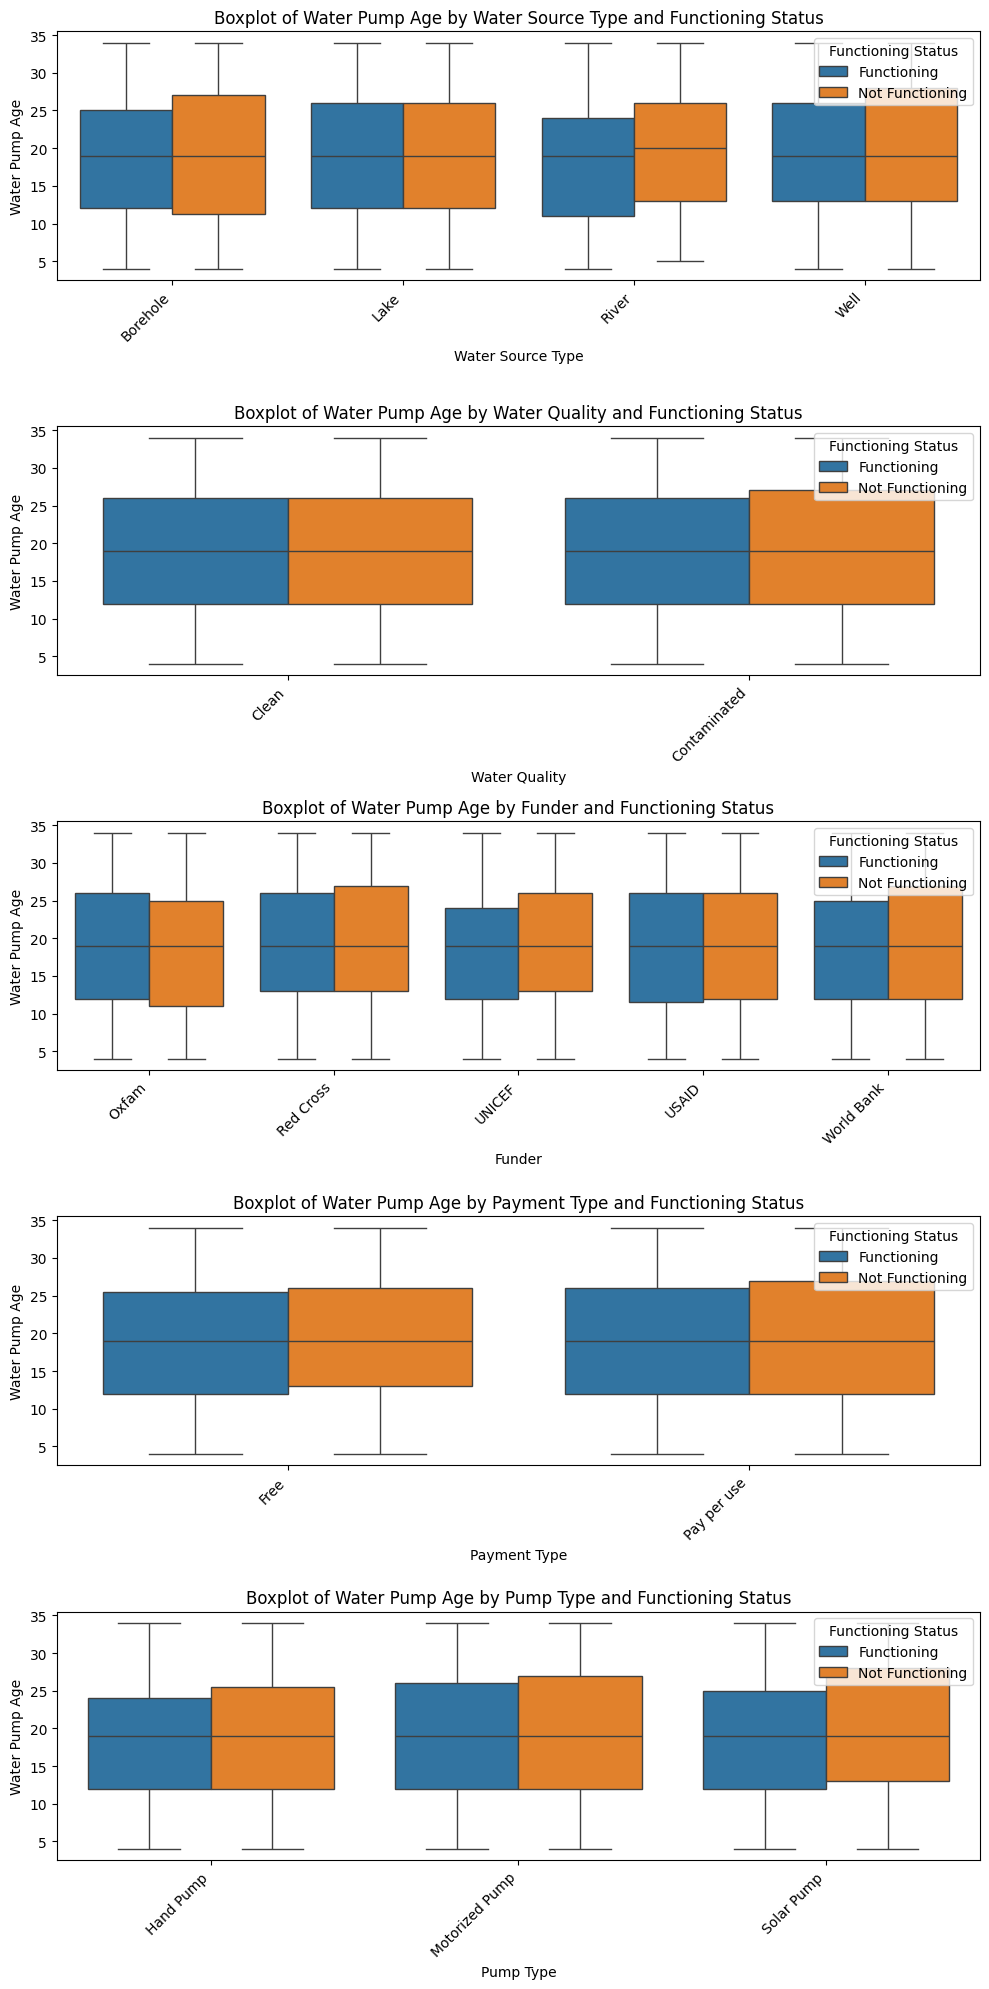

In [219]:
# Box plots for 'Functioning Status' against categorical features by Water Pump Age
# Set the size of the figure
plt.figure(figsize=(10, 20))
categorical_columns = ['Water Source Type', 'Water Quality', 'Funder','Payment Type', 'Pump Type']
# Number of categorical features
num_features = len(categorical_columns)

# Create subplots
for i, column in enumerate(categorical_columns):
    plt.subplot(num_features, 1, i + 1)  # Create a subplot for each categorical feature
    sns.boxplot(x=column, y='Water Pump Age', hue='Functioning Status', data=df_new)
    plt.title(f'Boxplot of Water Pump Age by {column} and Functioning Status')
    plt.xlabel(column)
    plt.ylabel('Water Pump Age')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Functioning Status', loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


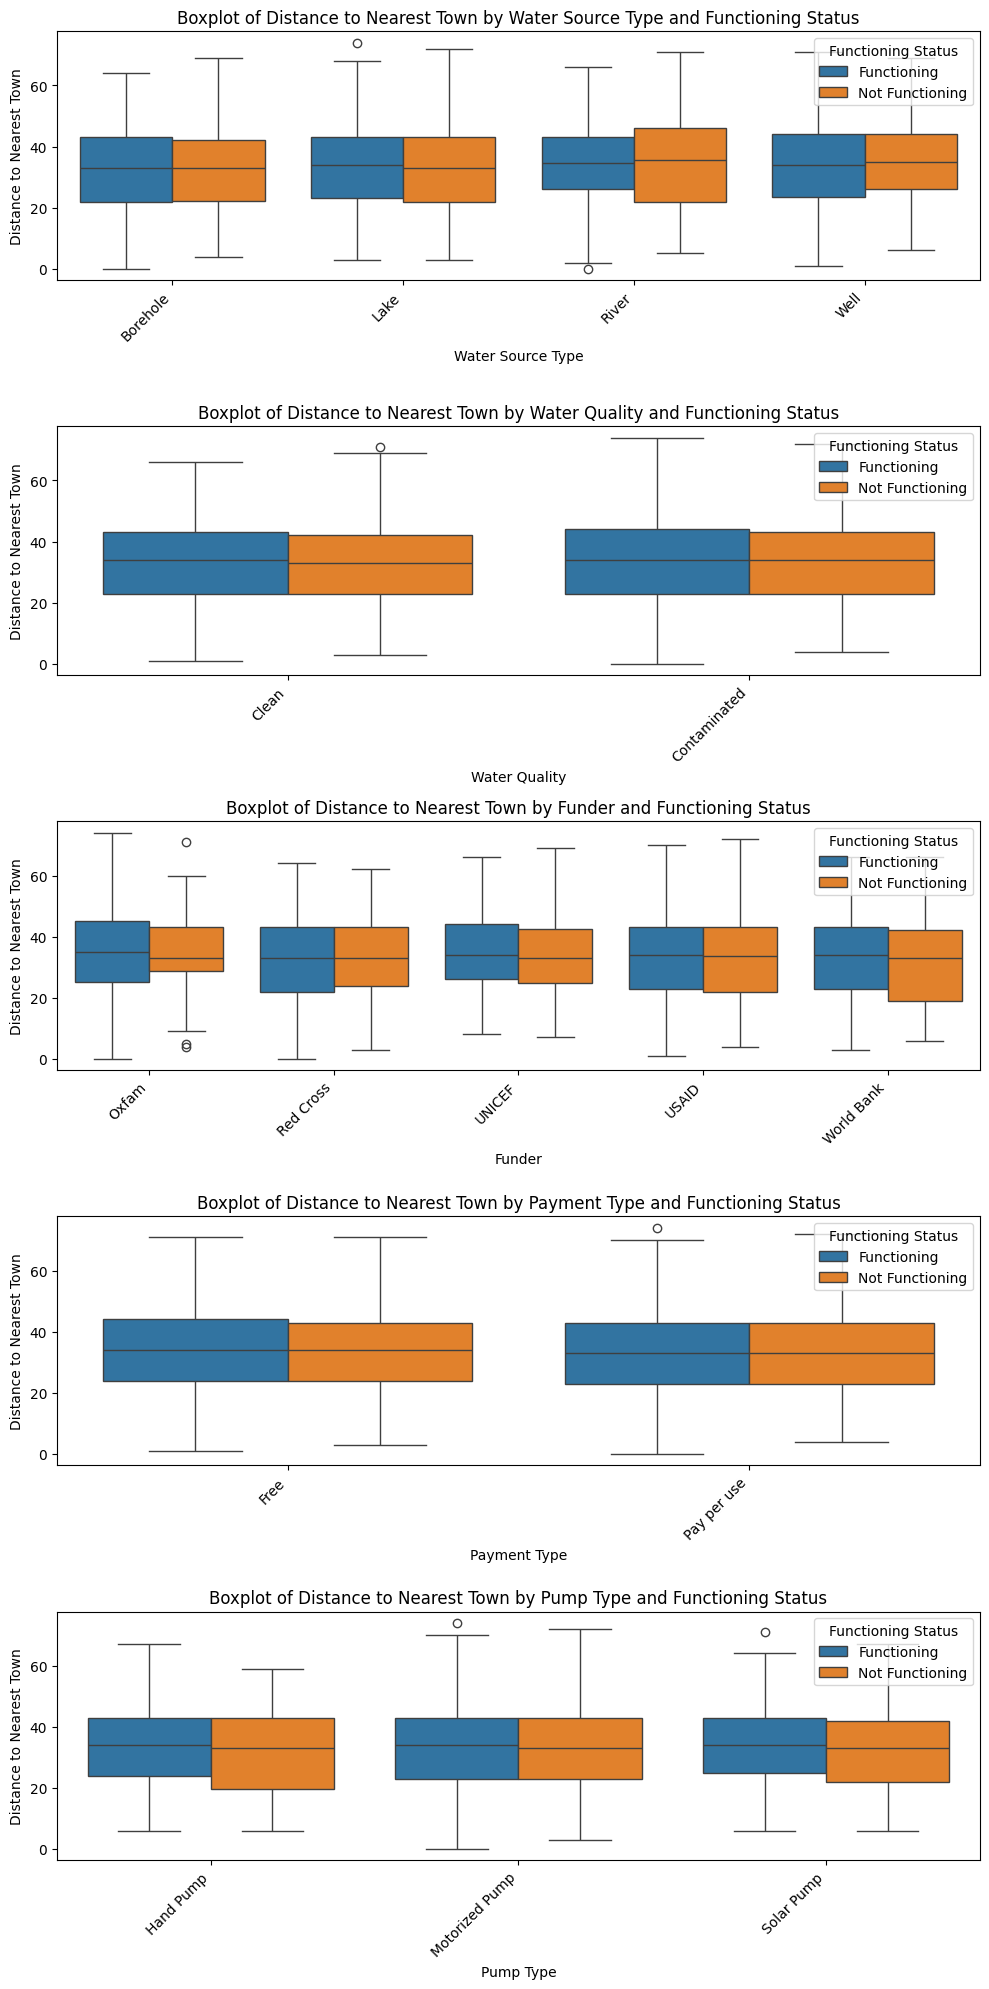

In [220]:
# Box plots for 'Functioning Status' against categorical features by Distance to Nearest Town

# Set the size of the figure
plt.figure(figsize=(10, 20))
categorical_columns = ['Water Source Type', 'Water Quality', 'Funder','Payment Type', 'Pump Type']
# Number of categorical features
num_features = len(categorical_columns)

# Create subplots
for i, column in enumerate(categorical_columns):
    plt.subplot(num_features, 1, i + 1)  # Create a subplot for each categorical feature
    sns.boxplot(x=column, y='Distance to Nearest Town', hue='Functioning Status', data=df_new)
    plt.title(f'Boxplot of Distance to Nearest Town by {column} and Functioning Status')
    plt.xlabel(column)
    plt.ylabel('Distance to Nearest Town')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Functioning Status', loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



---

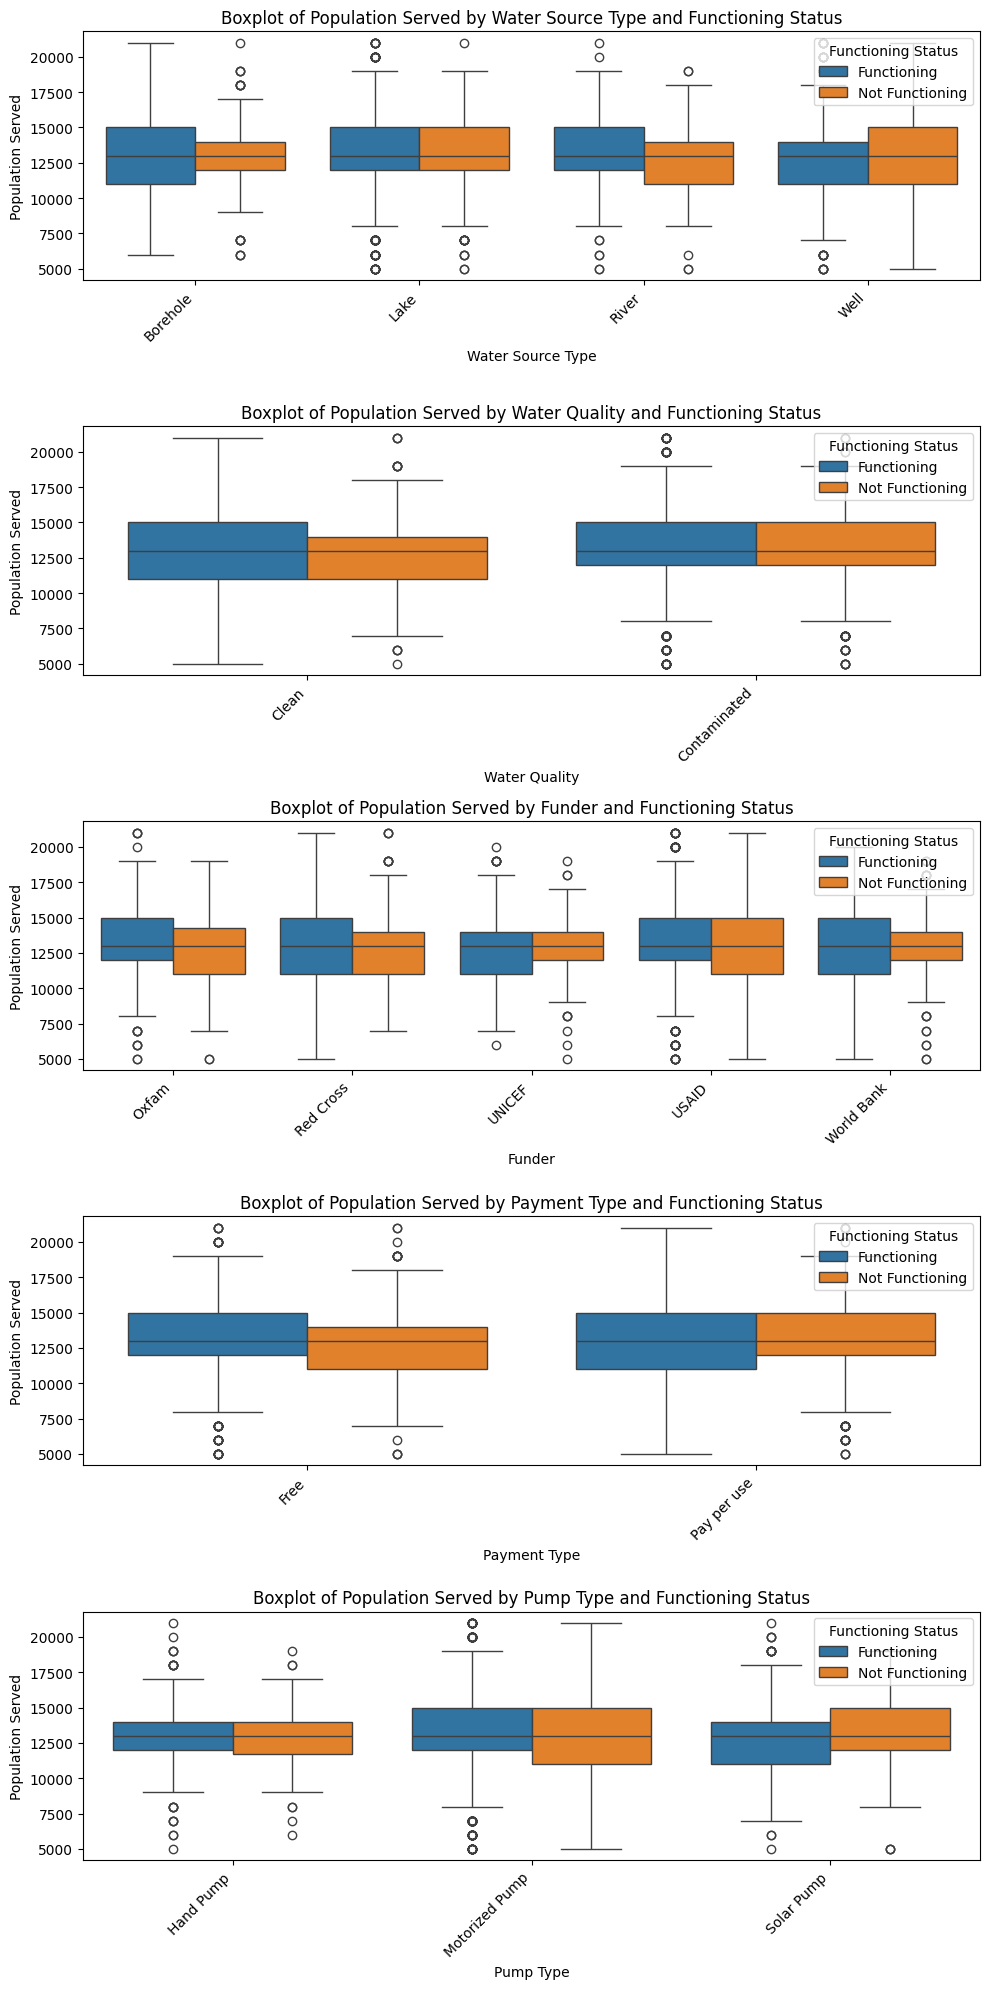

In [221]:
# Box plots for 'Functioning Status' against categorical features by Population Served

# Set the size of the figure
plt.figure(figsize=(10, 20))
categorical_columns = ['Water Source Type', 'Water Quality', 'Funder','Payment Type', 'Pump Type']
# Number of categorical features
num_features = len(categorical_columns)

# Create subplots
for i, column in enumerate(categorical_columns):
    plt.subplot(num_features, 1, i + 1)  # Create a subplot for each categorical feature
    sns.boxplot(x=column, y='Population Served', hue='Functioning Status', data=df_new)
    plt.title(f'Boxplot of Population Served by {column} and Functioning Status')
    plt.xlabel(column)
    plt.ylabel('Population Served')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Functioning Status', loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [222]:
df_new.head(5)

,Water Pump ID,Water Source Type,Water Quality,Distance to Nearest Town,Population Served,Funder,Water Pump Age,Payment Type,Pump Type,Functioning Status,Latitude,Longitude
0,WP001,Lake,Contaminated,37,13000,Oxfam,11,Free,Motorized Pump,Not Functioning,-20.671989,24.746129
1,WP002,Lake,Contaminated,7,11000,Red Cross,32,Free,Motorized Pump,Functioning,-20.157282,25.785519
2,WP003,Lake,Contaminated,45,10000,USAID,31,Pay per use,Motorized Pump,Functioning,-23.738542,22.355246
3,WP004,Well,Contaminated,8,14000,Red Cross,19,Free,Motorized Pump,Functioning,-18.360569,26.512975
4,WP005,Lake,Contaminated,29,9000,Red Cross,18,Free,Motorized Pump,Functioning,-18.907023,26.194293


In [224]:
# One-hot encode the categorical columns
df_new2 = pd.get_dummies(df_new, columns=['Water Source Type', 'Water Quality', 'Funder','Payment Type', 'Pump Type'], drop_first=True)

# Convert any boolean columns to integers (0/1)
df_new2 = df_new2.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Label encode the 'Functioning Status' column
label_encoder = LabelEncoder()
df_new2['Functioning Status'] = label_encoder.fit_transform(df_new2['Functioning Status'])

df_new2.head(5)

,Water Pump ID,Distance to Nearest Town,Population Served,Water Pump Age,Functioning Status,Latitude,Longitude,Water Source Type_Lake,Water Source Type_River,Water Source Type_Well,Water Quality_Contaminated,Funder_Red Cross,Funder_UNICEF,Funder_USAID,Funder_World Bank,Payment Type_Pay per use,Pump Type_Motorized Pump,Pump Type_Solar Pump
0,WP001,37,13000,11,1,-20.671989,24.746129,1,0,0,1,0,0,0,0,0,1,0
1,WP002,7,11000,32,0,-20.157282,25.785519,1,0,0,1,1,0,0,0,0,1,0
2,WP003,45,10000,31,0,-23.738542,22.355246,1,0,0,1,0,0,1,0,1,1,0
3,WP004,8,14000,19,0,-18.360569,26.512975,0,0,1,1,1,0,0,0,0,1,0
4,WP005,29,9000,18,0,-18.907023,26.194293,1,0,0,1,1,0,0,0,0,1,0


In [225]:
df_new2.columns

Index(['Water Pump ID', 'Distance to Nearest Town', 'Population Served',
       'Water Pump Age', 'Functioning Status', 'Latitude', 'Longitude',
       'Water Source Type_Lake', 'Water Source Type_River',
       'Water Source Type_Well', 'Water Quality_Contaminated',
       'Funder_Red Cross', 'Funder_UNICEF', 'Funder_USAID',
       'Funder_World Bank', 'Payment Type_Pay per use',
       'Pump Type_Motorized Pump', 'Pump Type_Solar Pump'],
      dtype='object')

In [227]:

# Creating feature and target dataset 
X = df_new2.drop(columns=['Water Pump ID',
                          'Functioning Status', 
                          'Latitude', 'Longitude'
                           ])
Y = df_new2['Functioning Status'] 
scaler = MinMaxScaler()
X[['Distance to Nearest Town', 'Population Served','Water Pump Age']] = scaler.fit_transform(X[['Distance to Nearest Town','Population Served', 'Water Pump Age']])


In [228]:
X.head(10)

,Distance to Nearest Town,Population Served,Water Pump Age,Water Source Type_Lake,Water Source Type_River,Water Source Type_Well,Water Quality_Contaminated,Funder_Red Cross,Funder_UNICEF,Funder_USAID,Funder_World Bank,Payment Type_Pay per use,Pump Type_Motorized Pump,Pump Type_Solar Pump
0,0.500000,0.5000,0.233333,1,0,0,1,0,0,0,0,0,1,0
1,0.094595,0.3750,0.933333,1,0,0,1,1,0,0,0,0,1,0
2,0.608108,0.3125,0.900000,1,0,0,1,0,0,1,0,1,1,0
3,0.108108,0.5625,0.500000,0,0,1,1,1,0,0,0,0,1,0
4,0.391892,0.2500,0.466667,1,0,0,1,1,0,0,0,0,1,0
5,0.405405,0.6875,0.266667,1,0,0,1,0,0,0,1,1,0,0
6,0.256757,0.5000,0.033333,1,0,0,1,0,0,1,0,1,0,1
7,0.351351,0.2500,0.633333,1,0,0,1,0,0,1,0,1,1,0
8,0.445946,0.5000,0.900000,0,0,0,0,0,0,0,1,1,1,0
9,0.662162,0.5000,0.466667,1,0,0,0,0,1,0,0,1,1,0


In [229]:
X.columns

Index(['Distance to Nearest Town', 'Population Served', 'Water Pump Age',
       'Water Source Type_Lake', 'Water Source Type_River',
       'Water Source Type_Well', 'Water Quality_Contaminated',
       'Funder_Red Cross', 'Funder_UNICEF', 'Funder_USAID',
       'Funder_World Bank', 'Payment Type_Pay per use',
       'Pump Type_Motorized Pump', 'Pump Type_Solar Pump'],
      dtype='object')

In [230]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Functioning Status
Non-Null Count  Dtype
--------------  -----
5000 non-null   int32
dtypes: int32(1)
memory usage: 19.7 KB


In [231]:

# Split the dataset into 70/30
X_train_orig, X_test_orig, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.3)
print(f"X_train shape: {X_train_orig.shape}")
print(f"X_test shape: {X_test_orig.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (3500, 14)
X_test shape: (1500, 14)
Y_train shape: (3500,)
Y_test shape: (1500,)


                       Feature        VIF
12    Pump Type_Motorized Pump  11.307741
1            Population Served   8.419559
0     Distance to Nearest Town   6.496950
3       Water Source Type_Lake   4.531572
9                 Funder_USAID   3.944407
2               Water Pump Age   3.903959
6   Water Quality_Contaminated   3.837613
11    Payment Type_Pay per use   3.143795
13        Pump Type_Solar Pump   2.539365
7             Funder_Red Cross   2.538556
5       Water Source Type_Well   2.481176
10           Funder_World Bank   2.415186
4      Water Source Type_River   1.546244
8                Funder_UNICEF   1.314169


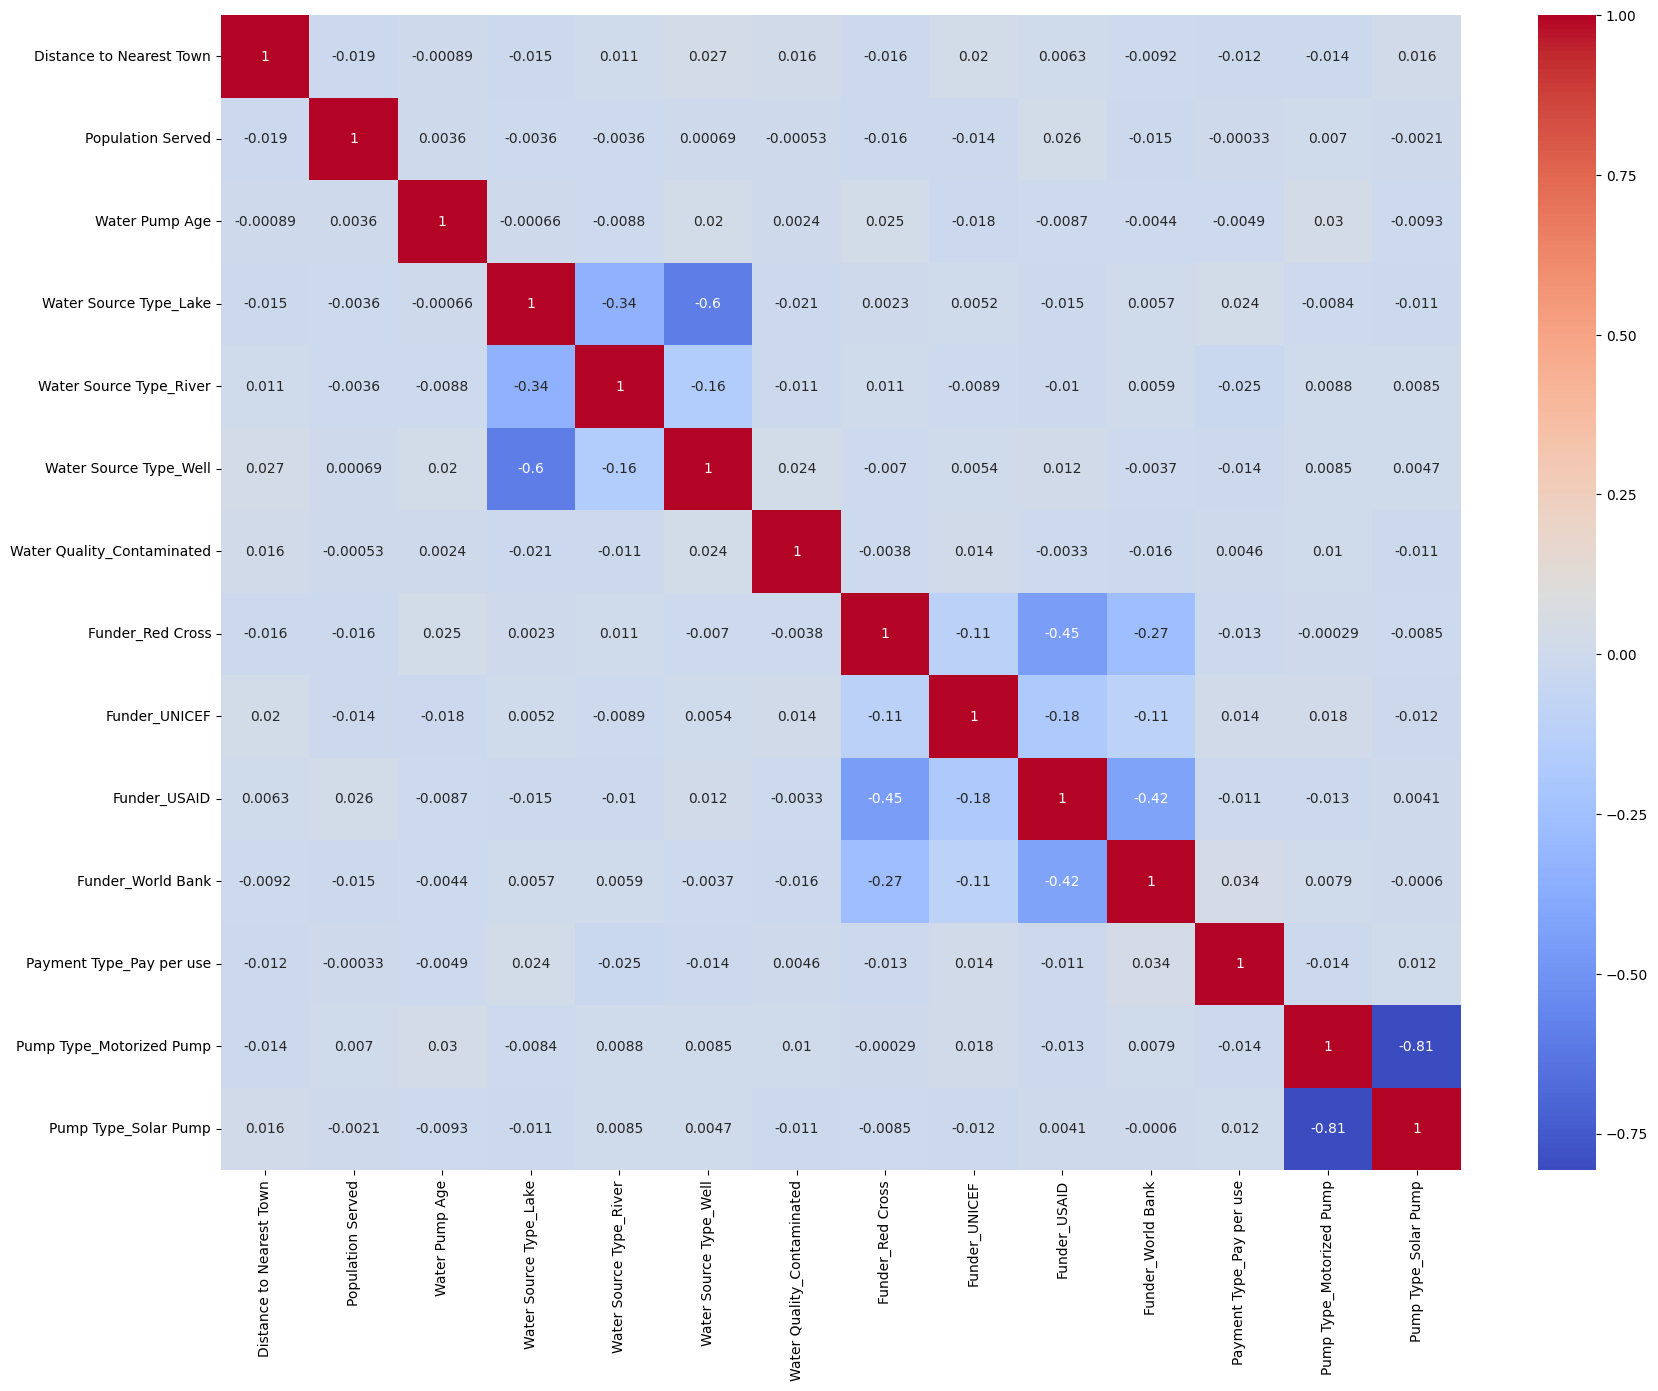

In [232]:
# creating copy of feature dataset
X_train_first = X_train_orig.copy()
X_test_first = X_test_orig.copy()

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the features in the dataset
vif = calculate_vif(X_train_first)
print(vif.sort_values(by='VIF',ascending=False))

# Calculate correlation
correlation_matrix1 = X_train_first.corr()

# Visualize correlation using a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', cbar=True)
plt.show()

                      Feature       VIF
0    Distance to Nearest Town  4.078213
3  Water Quality_Contaminated  3.206726
1              Water Pump Age  3.177006
4            Funder_Red Cross  1.270700
6        Pump Type_Solar Pump  1.129998
2     Water Source Type_River  1.085132
5               Funder_UNICEF  1.055653


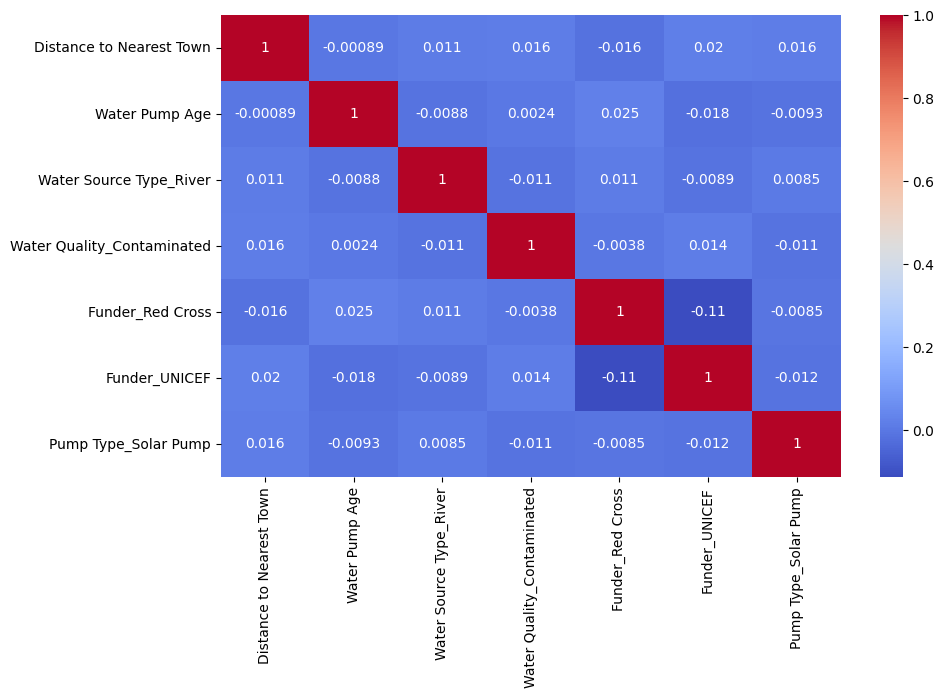

In [241]:
# Dropping column with high VIF value
X_train = X_train_first.drop(['Pump Type_Motorized Pump','Water Source Type_Lake',
                              'Water Source Type_Well','Population Served',
                              'Payment Type_Pay per use','Funder_USAID','Funder_World Bank'
                              ], axis=1)
X_test = X_test_first.drop(['Pump Type_Motorized Pump','Water Source Type_Lake',
                              'Water Source Type_Well','Population Served',
                              'Payment Type_Pay per use','Funder_USAID','Funder_World Bank'
                            ], axis=1)

# Calculate VIF
vif = calculate_vif(X_train)
print(vif.sort_values(by='VIF',ascending=False))

# Calculate correlation
correlation_matrix1 = X_train.corr()

# Visualize correlation using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.show()

---

## Naive Bayes

Training Accuracy: 73.37%
Testing Accuracy: 72.93%

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1096
           1       0.00      0.00      0.00       404

    accuracy                           0.73      1500
   macro avg       0.37      0.50      0.42      1500
weighted avg       0.53      0.73      0.62      1500


Confusion Matrix (Testing):
[[1094    2]
 [ 404    0]]

ROC AUC Score (Testing): 0.49


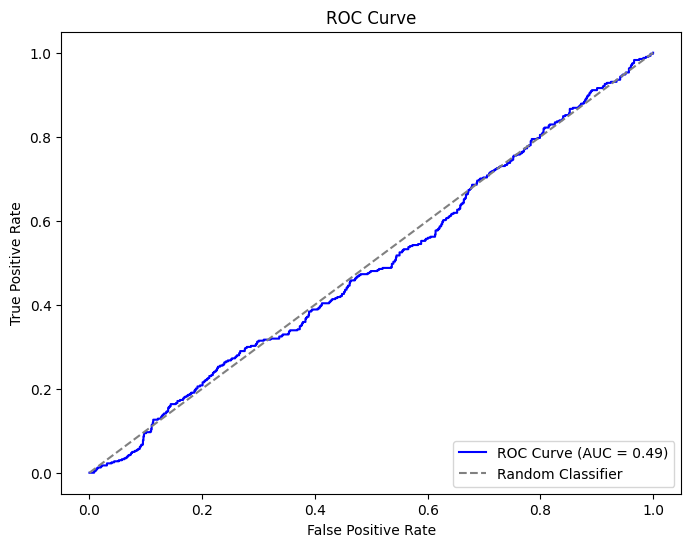

In [235]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
threshold = 0.5

# Predictions on the training set
y_train_pred_proba = nb_model.predict_proba(X_train)
Y_train_pred_nb = (y_train_pred_proba[:, 1] >= threshold).astype(int)
train_accuracy = accuracy_score(Y_train, Y_train_pred_nb)

# Predictions on the testing set
y_test_pred_proba = nb_model.predict_proba(X_test)
Y_test_pred_nb = (y_test_pred_proba[:, 1] >= threshold).astype(int)
test_accuracy = accuracy_score(Y_test, Y_test_pred_nb)

# Print training and testing accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Evaluate the model's performance on the testing set
print("\nClassification Report (Testing):")
print(classification_report(Y_test, Y_test_pred_nb))

print("\nConfusion Matrix (Testing):")
print(confusion_matrix(Y_test, Y_test_pred_nb))

# Calculate ROC AUC score (using predicted probabilities for the positive class)
y_test_pred_proba_class_1 = y_test_pred_proba[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(Y_test, y_test_pred_proba_class_1)
print(f"\nROC AUC Score (Testing): {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred_proba_class_1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Training Accuracy (Resampled): 53.70%
Testing Accuracy (Resampled): 42.27%

Classification Report (Testing, Resampled):
              precision    recall  f1-score   support

           0       0.72      0.34      0.46      1096
           1       0.26      0.64      0.38       404

    accuracy                           0.42      1500
   macro avg       0.49      0.49      0.42      1500
weighted avg       0.60      0.42      0.44      1500


Confusion Matrix (Testing, Resampled):
[[374 722]
 [144 260]]

ROC AUC Score (Testing, Resampled): 0.49


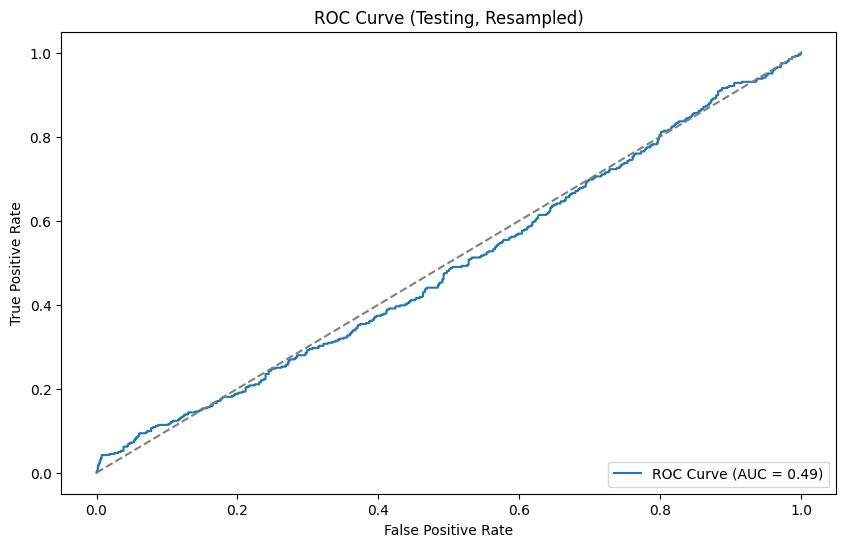

In [236]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Train Naive Bayes model on resampled data
nb_model_resampled = GaussianNB()
nb_model_resampled.fit(X_train_resampled, Y_train_resampled)
threshold = 0.5

# Predictions on the training set
y_train_resampled_pred_proba = nb_model_resampled.predict_proba(X_train_resampled)
Y_train_resampled_pred_nb = (y_train_resampled_pred_proba[:, 1] >= threshold).astype(int)
train_accuracy_resampled = accuracy_score(Y_train_resampled, Y_train_resampled_pred_nb)

# Predictions on the testing set
y_test_resampled_pred_proba = nb_model_resampled.predict_proba(X_test)
Y_test_resampled_pred_nb = (y_test_resampled_pred_proba[:, 1] >= threshold).astype(int)
test_accuracy_resampled = accuracy_score(Y_test, Y_test_resampled_pred_nb)

# Print training and testing accuracies
print(f"Training Accuracy (Resampled): {train_accuracy_resampled * 100:.2f}%")
print(f"Testing Accuracy (Resampled): {test_accuracy_resampled * 100:.2f}%")

# Evaluate the model's performance on the testing set
print("\nClassification Report (Testing, Resampled):")
print(classification_report(Y_test, Y_test_resampled_pred_nb))

print("\nConfusion Matrix (Testing, Resampled):")
print(confusion_matrix(Y_test, Y_test_resampled_pred_nb))

# Calculate ROC AUC score (using predicted probabilities for the positive class)
y_test_resampled_pred_proba = nb_model_resampled.predict_proba(X_test)[:, 1]  # Probability estimates for class 1
roc_auc_resampled = roc_auc_score(Y_test, y_test_resampled_pred_proba)
print(f"\nROC AUC Score (Testing, Resampled): {roc_auc_resampled:.2f}")

# Optional: Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_resampled_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier diagonal
plt.title('ROC Curve (Testing, Resampled)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

---

## Logistic Regression

Training Accuracy: 49.20%
Testing Accuracy: 47.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.45      0.56      1096
           1       0.27      0.55      0.36       404

    accuracy                           0.48      1500
   macro avg       0.50      0.50      0.46      1500
weighted avg       0.61      0.48      0.50      1500


Confusion Matrix:
[[491 605]
 [180 224]]

ROC AUC Score: 0.50


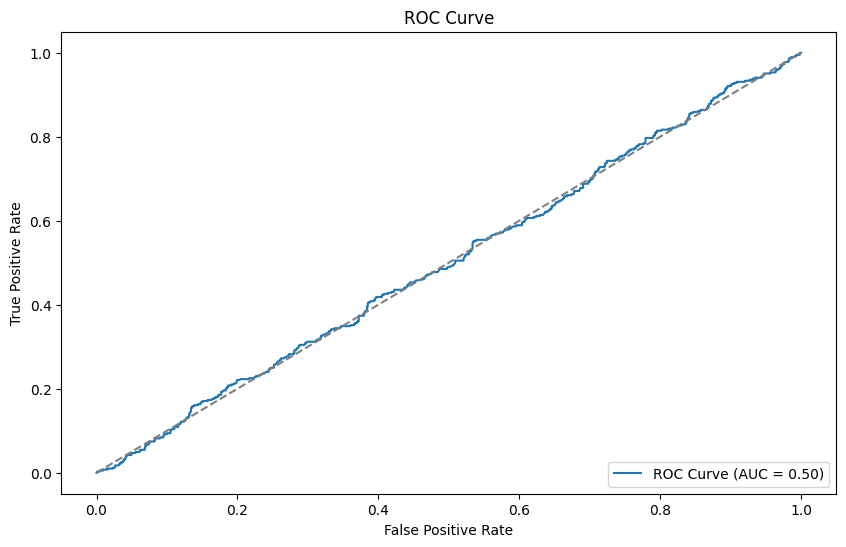

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model with class balancing
lr_model = LogisticRegression(random_state=0, penalty=None, class_weight='balanced')

# Train the model on the training set
lr_model.fit(X_train, Y_train)

# Predictions on the training set
Y_train_pred_lr = lr_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred_lr)

# Predictions on the testing set
Y_pred_lr = lr_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred_lr)

# Print the accuracy on the training and testing datasets
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Print classification report and confusion matrix for the testing set
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_lr))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_lr))

# Calculate ROC AUC score (using predicted probabilities for the positive class)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (class 1)
roc_auc = roc_auc_score(Y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# Optional: Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier diagonal
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [243]:
import statsmodels.api as sm
# Fit the logistic regression model using statsmodels
X_train_plus = sm.add_constant(X_train)
model = sm.Logit(Y_train, X_train_plus).fit()

# Print the summary of the model to see p-values
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.579259
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:     Functioning Status   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3492
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                0.001462
Time:                        00:15:54   Log-Likelihood:                -2027.4
converged:                       True   LL-Null:                       -2030.4
Covariance Type:            nonrobust   LLR p-value:                    0.5469
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.0408      0.143     -7.289      0.000      


Top Features Based on Coefficients:
                       Feature  Coefficient  Absolute Coefficient
7                Funder_UNICEF    -0.185889              0.185889
0     Distance to Nearest Town    -0.169617              0.169617
11        Pump Type_Solar Pump    -0.156436              0.156436
3      Water Source Type_River     0.131783              0.131783
2               Water Pump Age     0.121372              0.121372
6             Funder_Red Cross     0.063284              0.063284
5   Water Quality_Contaminated     0.060561              0.060561
4       Water Source Type_Well     0.036154              0.036154
1            Population Served    -0.032262              0.032262
10    Payment Type_Pay per use     0.013099              0.013099
8                 Funder_USAID     0.011561              0.011561
9            Funder_World Bank    -0.010346              0.010346


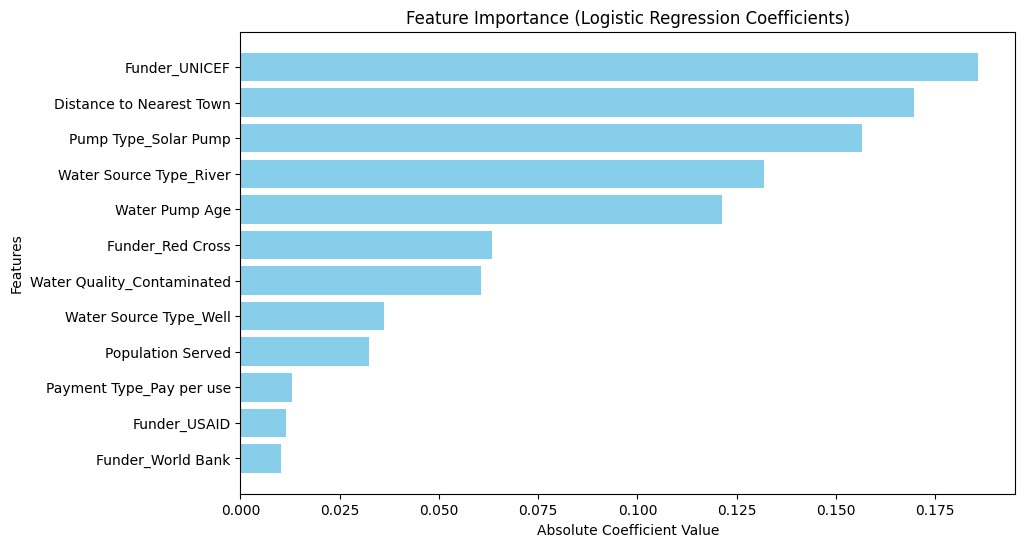

In [239]:
import numpy as np
import pandas as pd

# Get feature names (assuming you have a DataFrame for X_train)
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]

# Get coefficients from the model
coefficients = lr_model.coef_[0]  # For binary classification, only one set of coefficients

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the significant features
print("\nTop Features Based on Coefficients:")
print(importance_df)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute Coefficient'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()


In [ ]:
X_train.head(10)

,Distance to Nearest Town,Population Served,Water Pump Age,Water Source Type_River,Water Source Type_Well,Water Quality_Contaminated,Funder_Payment_Type_Oxfam_Pay per use,Funder_Payment_Type_Red Cross_Free,Funder_Payment_Type_Red Cross_Pay per use,Funder_Payment_Type_UNICEF_Free,Funder_Payment_Type_UNICEF_Pay per use,Funder_Payment_Type_USAID_Free,Funder_Payment_Type_USAID_Pay per use,Funder_Payment_Type_World Bank_Free,Funder_Payment_Type_World Bank_Pay per use,Pump Type_Solar Pump
2858,0.256757,0.9375,0.600000,0,1,0,0,1,0,0,0,0,0,0,0,0
1559,0.364865,0.9375,0.833333,0,0,1,0,0,0,0,0,0,1,0,0,0
1441,0.337838,0.8125,0.900000,0,1,1,0,0,0,0,0,0,1,0,0,0
2179,0.459459,0.3750,0.133333,0,0,1,1,0,0,0,0,0,0,0,0,0
1390,0.270270,0.5000,0.100000,0,1,1,0,0,0,0,0,0,1,0,0,0
2575,0.472973,0.5000,0.600000,0,0,0,0,0,1,0,0,0,0,0,0,0
467,0.364865,0.3125,0.233333,0,0,1,0,0,0,0,0,0,1,0,0,0
4448,0.202703,0.6875,0.466667,0,0,0,0,0,0,0,0,0,1,0,0,0
276,0.540541,0.2500,0.600000,0,0,1,0,0,0,0,0,1,0,0,0,0
1046,0.202703,0.6250,0.366667,0,0,1,0,0,0,0,0,0,1,0,0,0


Decision Tree Classifier

Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      1096
           1       0.33      0.01      0.03       404

    accuracy                           0.73      1500
   macro avg       0.53      0.50      0.43      1500
weighted avg       0.62      0.73      0.62      1500

Confusion Matrix:
 [[1084   12]
 [ 398    6]]

ROC AUC Score (Testing): 0.51


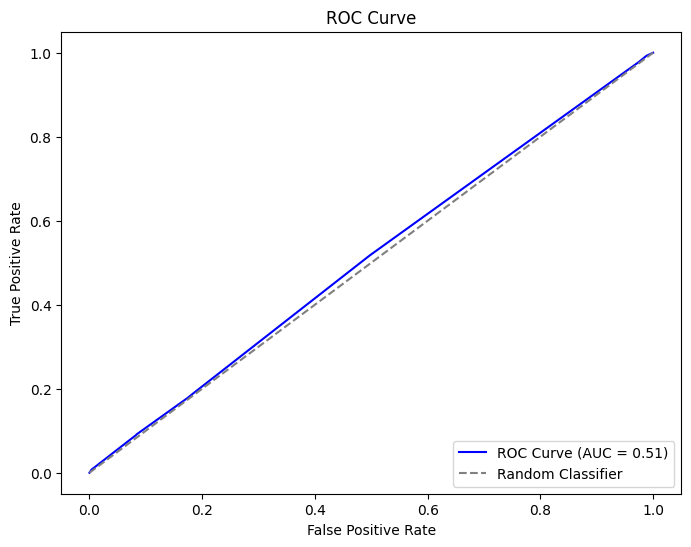

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Decision Tree Classifier
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)  # Customize parameters as needed

# Fit the model
clf1.fit(X_train, Y_train)

# Predict on test set
y_pred = clf1.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate ROC AUC score (using predicted probabilities for the positive class)
y_pred_proba = clf1.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(Y_test, y_pred_proba)
print(f"\nROC AUC Score (Testing): {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

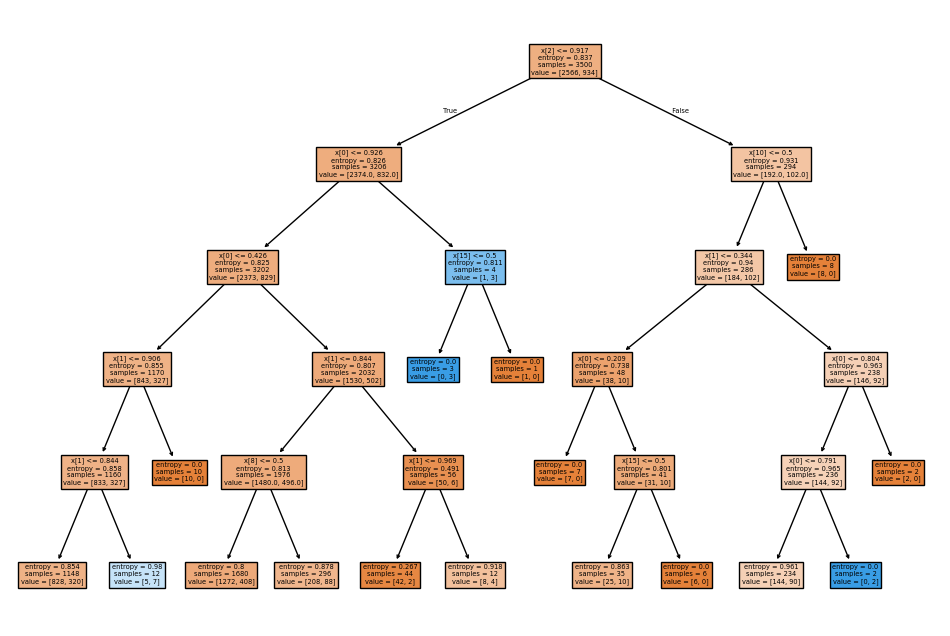

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf1, filled=True)
plt.show()

Random Forest Classifier

Accuracy: 0.693

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      1096
           1       0.26      0.08      0.12       404

    accuracy                           0.69      1500
   macro avg       0.50      0.50      0.47      1500
weighted avg       0.60      0.69      0.63      1500


Confusion Matrix:
[[1007   89]
 [ 372   32]]

ROC AUC Score: 0.48


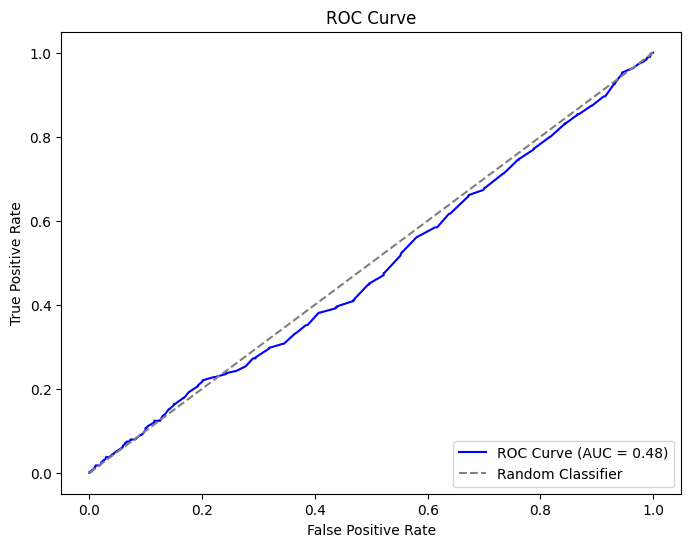

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, Y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.681

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1096
           1       0.28      0.11      0.16       404

    accuracy                           0.68      1500
   macro avg       0.50      0.50      0.48      1500
weighted avg       0.61      0.68      0.63      1500


Confusion Matrix:
[[975 121]
 [358  46]]

ROC AUC Score: 0.49


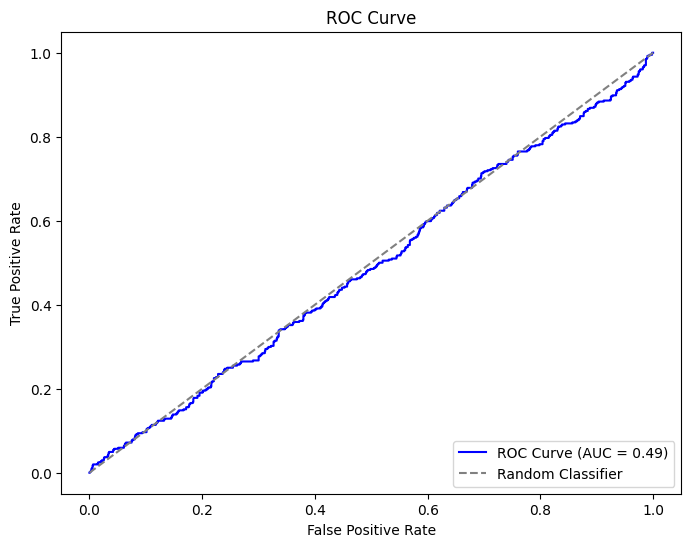

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Create the base models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
gb_classifier = GradientBoostingClassifier(random_state=42)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)  # Resample training data

# Combine the models into a voting classifier (Soft Voting)
voting_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('gb', gb_classifier)], voting='soft')

# Train the voting classifier with the resampled data
voting_classifier.fit(X_train_res, Y_train_res)

# Predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = voting_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Neural Network

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import History
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = History()
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32,
                    callbacks=[history])

# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Testing Accuracy:", test_accuracy)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5280 - loss: 0.6866 - val_accuracy: 0.7307 - val_loss: 0.6083
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7309 - loss: 0.6003 - val_accuracy: 0.7307 - val_loss: 0.5885
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.5752 - val_accuracy: 0.7307 - val_loss: 0.5863
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7314 - loss: 0.5856 - val_accuracy: 0.7307 - val_loss: 0.5857
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7322 - loss: 0.5837 - val_accuracy: 0.7307 - val_loss: 0.5855
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.5751 - val_accuracy: 0.7307 - val_loss: 0.5853
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7272 - loss: 0.5881 - val_accuracy: 0.7307 - val_loss: 0.5851
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7265 - loss: 0.5877 - val_accuracy: 0.

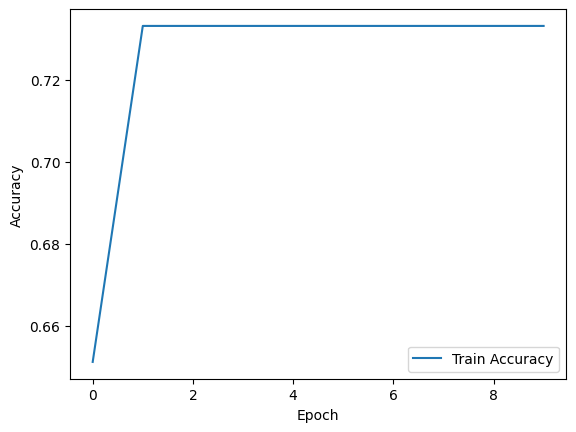

In [ ]:
#history = model.fit(X_train2, Y_train, epochs=15, batch_size=32)

# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import History
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_resampled.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = History()
history = model.fit(X_train_resampled, Y_train_resampled, validation_data=(X_test, Y_test), epochs=10, batch_size=32, callbacks=[history])

# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(X_train_resampled, Y_train_resampled)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Testing Accuracy:", test_accuracy)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5085 - loss: 0.6945 - val_accuracy: 0.6480 - val_loss: 0.6834
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5129 - loss: 0.6928 - val_accuracy: 0.4553 - val_loss: 0.6932
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5228 - loss: 0.6920 - val_accuracy: 0.4413 - val_loss: 0.6939
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5200 - loss: 0.6918 - val_accuracy: 0.4800 - val_loss: 0.6922
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5219 - loss: 0.6916 - val_accuracy: 0.4427 - val_loss: 0.6943
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5237 - loss: 0.6917 - val_accuracy: 0.4573 - val_loss: 0.6932
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5251 - loss: 0.6907 - val_accuracy: 0.4327 - val_loss: 0.6950
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5287 - loss: 0.6912 - val_accuracy: 0.